In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df_regression = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
df_classification=pd.read_csv('train.csv')

In [5]:
df_classification.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df_classification.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df_regression.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## EDA

In [8]:
X=df_classification[['battery_power','blue','int_memory','clock_speed','n_cores','ram','four_g']]
y=df_classification[['price_range']]

In [9]:
X_lr=df_regression.drop('MEDV',axis=1)
y_lr=df_regression[['MEDV']]

In [10]:
from sklearn.model_selection import train_test_split

### ML

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [13]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.metrics import classification_report # for classification report
from sklearn.metrics import plot_confusion_matrix #for ploting comfusion matrix

In [15]:
clf1=SVC(random_state=42)
clf2=AdaBoostClassifier(n_estimators=100,random_state=42)
clf3=XGBClassifier(random_state=42)
clf4=RandomForestClassifier(max_depth=2, random_state=42)
clf5=LDA()

In [16]:
lr1=SVR()
lr2=XGBRegressor(random_state=42)
lr3=AdaBoostRegressor(random_state=42)
lr4=RandomForestRegressor(random_state=42)
lr5=LogisticRegression(random_state=42)

In [17]:
ml_obj={}

In [22]:
class ml:
    def __init__(self, X, y, type):
        self.X = X
        self.y = y
        self.type = type

    def preprocessing(self):
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.33, random_state=42)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def ml_prediction(self):
        if (self.type == 'classification'):
            params_classification = {'SVC': {'kernel': ['sigmoid', 'linear', 'poly', 'rbf']},
                                     'AdaBoostClassifier': {'n_estimators': [10, 100, 1000]},
                                     'XGBClassifier': {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
                                     'RandomForestClassifier': {'max_depth': [10, 40, 70, 100, 1000]},
                                     # 'LDA':{'solver':['svd','Isqr','eigen']}
                                     }
            models_classification = {'SVC': clf1, 'AdaBoostClassifier': clf2,
                                     'XGBClassifier': clf3, 'RandomForestClassifier': clf4}
            for model_name, model in models_classification.items():
                grid_search = GridSearchCV(
                    model, param_grid=params_classification[model_name], cv=3, n_jobs=-1, verbose=1)
                clf_ = grid_search.fit(self.X, self.y)
                y_pred = clf_.predict(self.X_test)
                ml_obj[model_name] = [y_pred, self.y_test]
                print(f'for {model_name}',
                      classification_report(y_pred, self.y_test))
                plot_confusion_matrix(
                    clf_, self.X_test, self.y_test)
        elif (self.type == 'regression'):
            params_regression = {'SVR': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                                 'XGBRegressor': {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
                                 'AdaBoostRegressor': {'loss': ['linear', 'square', 'exponential']},
                                 'RandomForestRegressor': {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
                                 # 'LogisticRegression':{'C':[0.001,0.01,0.1,1,10,100]}
                                 }
            models_regression = {'SVR': lr1, 'XGBRegressor': lr2,
                                 'AdaBoostRegressor': lr3, 'RandomForestRegressor': lr4}
            for model_name, model in models_regression.items():
                grid_search = GridSearchCV(
                    model, param_grid=params_regression[model_name], cv=3, n_jobs=-1, verbose=1)
                print(grid_search)
                lr_ = grid_search.fit(self.X, self.y)
                y_pred = lr_.predict(self.X_test)
                ml_obj[model_name] = [y_pred, self.y_test]

    def model_chart(self):
        for model_name, y_ in ml_obj.items():
            fig, axs = plt.subplots(2, 2, figsize=(10, 10))
            axs[0, 0].scatter(y_[0], y_[1])
            axs[0, 1].boxplot(y_[0])


Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


for SVC               precision    recall  f1-score   support

           0       0.93      0.91      0.92       173
           1       0.80      0.78      0.79       166
           2       0.70      0.70      0.70       163
           3       0.81      0.85      0.83       158

    accuracy                           0.81       660
   macro avg       0.81      0.81      0.81       660
weighted avg       0.81      0.81      0.81       660

Fitting 3 folds for each of 3 candidates, totalling 9 fits


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for AdaBoostClassifier               precision    recall  f1-score   support

           0       0.83      0.81      0.82       174
           1       0.64      0.62      0.63       168
           2       0.36      0.61      0.46        97
           3       0.93      0.70      0.80       221

    accuracy                           0.70       660
   macro avg       0.69      0.68      0.68       660
weighted avg       0.75      0.70      0.71       660



C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
for XGBClassifier               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       167

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


for RandomForestClassifier               precision    recall  f1-score   support

           0       0.98      0.99      0.99       166
           1       0.98      0.96      0.97       166
           2       0.96      0.95      0.95       164
           3       0.96      0.98      0.97       164

    accuracy                           0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


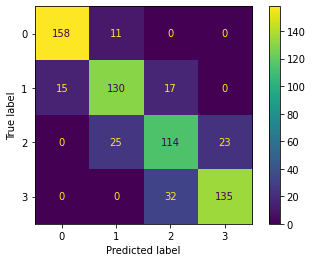

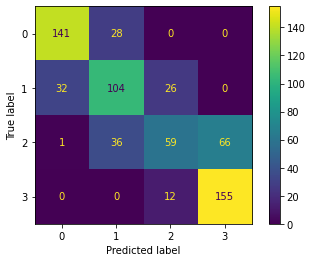

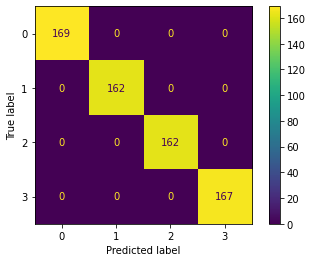

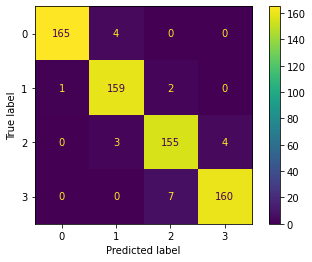

In [23]:
p2=ml(X,y,'classification')
p2.preprocessing()
p2.ml_prediction()

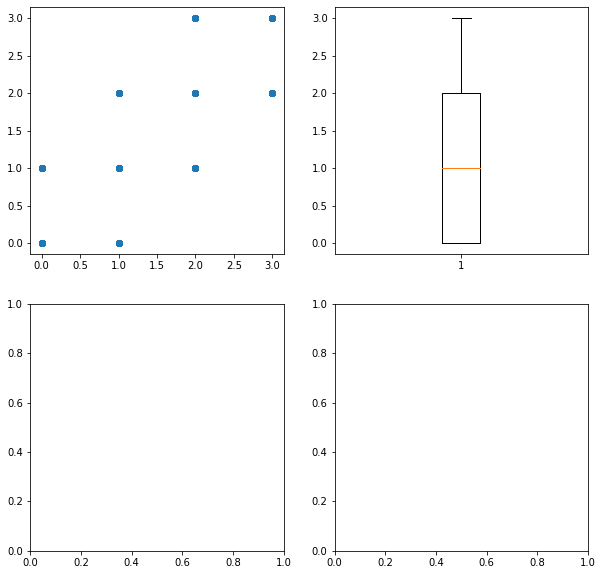

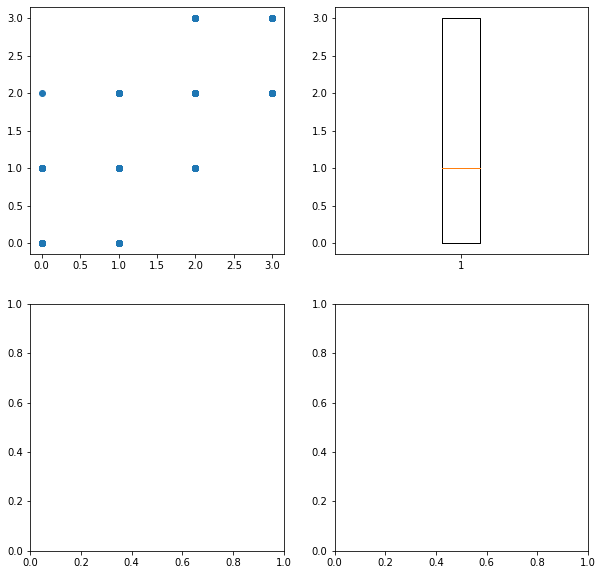

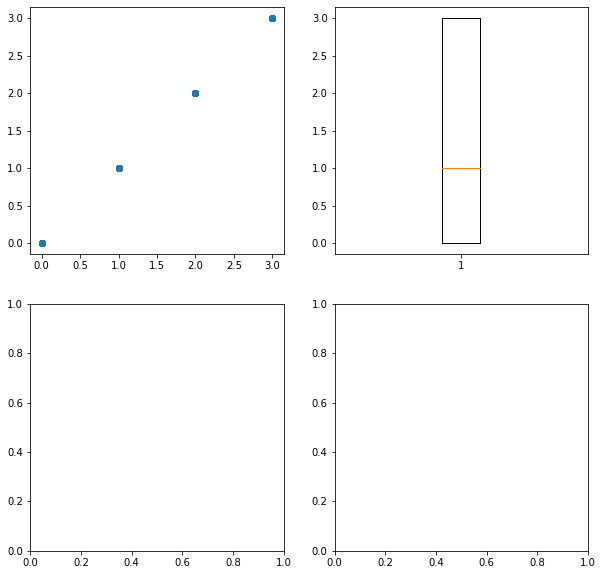

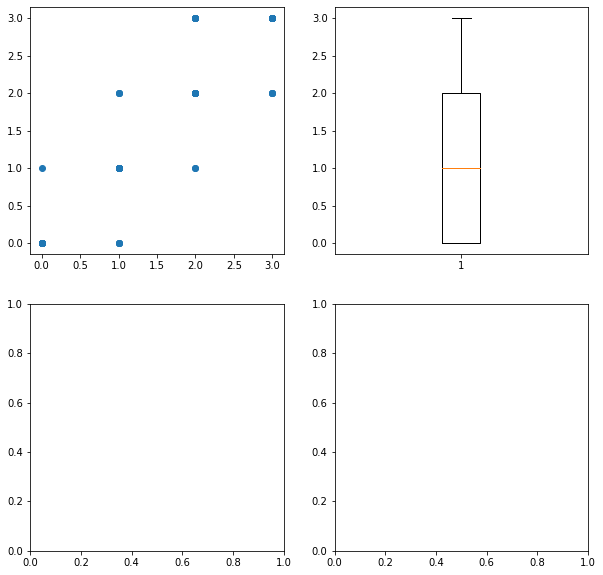

In [24]:
p2.model_chart()